In [2]:
# Standard imports
import sys
import os

import pandas as pd
import plotly.express as px

from glob import glob
from IPython.display import display, HTML

sys.path.insert(0,'..')
# Collaboarte Imports
from collaborate.preliminary_data_analysis import CollaboratePreliminaryAnalysis
from collaborate.html_helpers import ColloaborateHtmlTemplates
from collaborate.file_management import CollaborateManageFiles

In [3]:
collaborate_analysis = CollaboratePreliminaryAnalysis() 
collaborate_html = ColloaborateHtmlTemplates()
collaboarte_files = CollaborateManageFiles()

In [5]:
DATA_PATH = '../../shared-aqua-qi/data-preliminary/combined'
files_list = collaboarte_files.get_files_in_folder(PATH= DATA_PATH)
files_list

['../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-all-sites.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Debietmeter Rosteyne Zelzate.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Assenede - Ingang Evides.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Assenede - Ingang Kluizen.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Eeklo 1 - Ingang.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Eeklo 2 - Ingang.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Maldegem - Ingang.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Sint-Jan-In-Eremo - Uitgang.csv',
 '../../shared-aqua-qi/data-preliminary/combined/preliminary-data-optiqua-Watertoren Sleidinge - Ingang.csv',
 '../../shared

In [10]:
def create_dictionary_of_dataframes_from_paths(file_paths_list, 
                                               dtypes = {}, 
                                               suff = "", 
                                               ext = ".csv"):
    
    """Given a list of paths creates dataframe dictionary for each file
    
    currently requires a single extension but can change if needs must 
    
    Args
    
    
    
    # why there is a need to set dtypes 
    # note warning below is deprcated 
    https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
    
    """
    df_dict = {}
    print("Extension: ", ext)
    for path in file_paths_list:
        filename = path.split("/")[-1].replace(ext, "").replace(suff, "")
        print("creating dataframe for ", filename)
        if ext == ".csv":
            df_dict[filename] = pd.read_csv(path, dtype = dtypes)
        elif ext == "csv":
            df_dict[filename] = pd.read_csv(path)
        else:
            print ("Extension not yet supported contact the dev team to add")
    
    return df_dict
        
        
    
    

In [30]:
df_dict = create_dictionary_of_dataframes_from_paths(file_paths_list = files_list, 
                                           suff = "preliminary-data-optiqua-", 
                                           ext = ".csv", 
                                          )

createing dataframe for  all-sites


<ipython-input-30-a67df2ed6aa4>:1: DtypeWarning:

Columns (2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.



createing dataframe for  Debietmeter Rosteyne Zelzate
createing dataframe for  Watertoren Assenede - Ingang Evides


<ipython-input-30-a67df2ed6aa4>:1: DtypeWarning:

Columns (2,3,4,8,9) have mixed types.Specify dtype option on import or set low_memory=False.



createing dataframe for  Watertoren Assenede - Ingang Kluizen
createing dataframe for  Watertoren Eeklo 1 - Ingang
createing dataframe for  Watertoren Eeklo 2 - Ingang
createing dataframe for  Watertoren Maldegem - Ingang
createing dataframe for  Watertoren Sint-Jan-In-Eremo - Uitgang
createing dataframe for  Watertoren Sleidinge - Ingang
createing dataframe for  WPC Eeklo - Uitgang - Hoogdruk leiding
createing dataframe for  WPC Kluizen - Uitgang  - Hoogdruk leiding


In [31]:
df_dict['Debietmeter Rosteyne Zelzate'] = df_dict['Debietmeter Rosteyne Zelzate'].set_index("Timestamp")
df_dict['Debietmeter Rosteyne Zelzate'].columns.names = ["feature"]
df_dict['Debietmeter Rosteyne Zelzate']

feature             Sensor  DetectorB1  DetectorB2  DetectorB3  F24Response  \
Timestamp                                                                     
2017-01-16 16:56:18    Mgd    0.000000    0.000000    0.000000     0.000211   
2017-01-16 16:57:18    Mgd    0.000000    0.000000    0.000000    -0.000360   
2017-01-16 16:58:18    Mgd    0.000000    0.000000    0.000000    -0.000126   
2017-01-16 16:59:18    Mgd    0.000000    0.000000    0.000000    -0.000048   
2017-01-16 17:00:18    Mgd    0.000000    0.000000    0.000000    -0.000018   
...                    ...         ...         ...         ...          ...   
2019-01-16 13:19:41    Mgd    0.008949    0.013228    0.008949     0.035406   
2019-01-16 13:20:41    Mgd    0.013866    0.018145    0.013866     0.040268   
2019-01-16 13:21:41    Mgd    0.016585    0.020863    0.016585     0.042929   
2019-01-16 13:22:41    Mgd    0.014603    0.018881    0.014603     0.040891   
2019-01-16 13:23:41    Mgd    0.013921    0.018200    0.013921     0.040155   

feature                Response  SignalHealth  Threshold1  Threshold2  \
Timestamp                                                               
2017-01-16 16:56:18    4.923002      0.761930         1.0         1.5   
2017-01-16 16:57:18    4.923002      0.761930         1.0         1.5   
2017-01-16 16:58:18    4.923002      0.761930         1.0         1.5   
2017-01-16 16:59:18    4.923002      0.761930         1.0         1.5   
2017-01-16 17:00:18    4.923002      0.761930         1.0         1.5   
...                         ...           ...         ...         ...   
2019-01-16 13:19:41  264.735797      0.711636         1.0         1.5   
2019-01-16 13:20:41  264.741096      0.711611         1.0         1.5   
2019-01-16 13:21:41  264.744196      0.711463         1.0         1.5   
2019-01-16 13:22:41  264.742596      0.711482         1.0         1.5   
2019-01-16 13:23:41  264.742296      0.711325         1.0         1.5   

feature              temperature                          site  
Timestamp                                                       
2017-01-16 16:56:18        4.981  Debietmeter Rosteyne Zelzate  
2017-01-16 16:57:18        5.002  Debietmeter Rosteyne Zelzate  
2017-01-16 16:58:18        4.994  Debietmeter Rosteyne Zelzate  
2017-01-16 16:59:18        4.985  Debietmeter Rosteyne Zelzate  
2017-01-16 17:00:18        4.977  Debietmeter Rosteyne Zelzate  
...                          ...                           ...  
2019-01-16 13:19:41        7.080  Debietmeter Rosteyne Zelzate  
2019-01-16 13:20:41        7.141  Debietmeter Rosteyne Zelzate  
2019-01-16 13:21:41        7.195  Debietmeter Rosteyne Zelzate  
2019-01-16 13:22:41        7.074  Debietmeter Rosteyne Zelzate  
2019-01-16 13:23:41        6.909  Debietmeter Rosteyne Zelzate  

[938853 rows x 11 columns]

In [44]:
site = 'Debietmeter Rosteyne Zelzate'
fig = px.area(df_dict[site].drop(["Sensor",  "site"], axis = 1), 
              facet_col="feature", facet_col_wrap=2)

fig.write_html(f"plot_{site}.html")

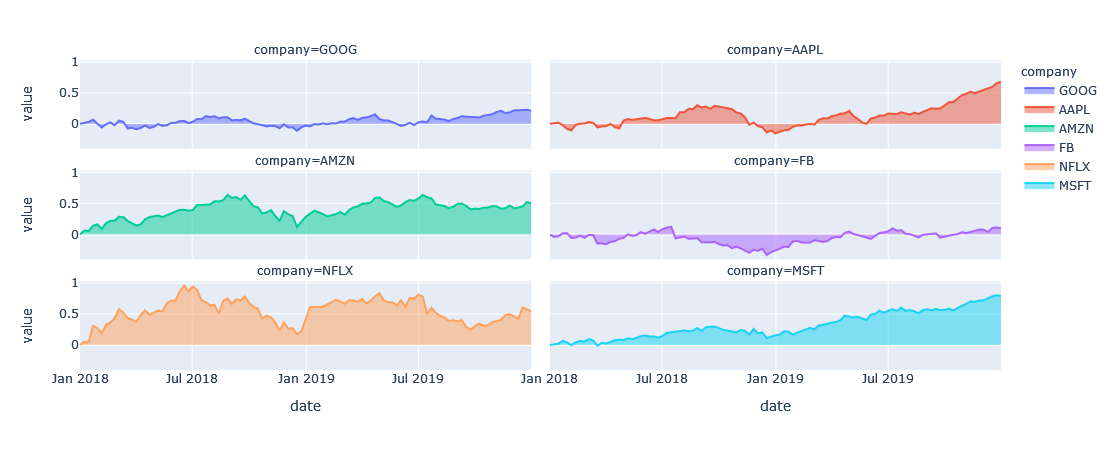

In [17]:
df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [18]:
df 

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2018-01-08  0.018172  0.011943  0.061881 -0.040032  0.053526  0.015988
2018-01-15  0.032008  0.019771  0.053240 -0.029757  0.049860  0.020524
2018-01-22  0.066783 -0.019943  0.140676  0.016858  0.307681  0.066561
2018-01-29  0.008773 -0.082857  0.163374  0.018357  0.273537  0.040708
...              ...       ...       ...       ...       ...       ...
2019-12-02  0.216280  0.546914  0.425061  0.075997  0.463641  0.720717
2019-12-09  0.222821  0.572286  0.432660  0.038855  0.421496  0.752239
2019-12-16  0.224418  0.596800  0.453455  0.104094  0.604362  0.784896
2019-12-23  0.226504  0.656000  0.521226  0.113728  0.567170  0.802472
2019-12-30  0.213014  0.678000  0.503360  0.098475  0.540883  0.788185

[105 rows x 6 columns]

In [ ]:
# for each measure plot timeseries by site 
feature = 'temperature'
fig = px.line(df_dict['all-sites'],
             x="Timestamp", 
             y=feature,
             color = "site", 
             title= feature, 
             )
fig.show()